Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* I'm glad to say that you executed your project really well.
* Thank you for structuring the project. It's a pleasure to check such notebooks.
* Confidence interval and risk of losses were calculated correctly. Well done!
* There are a couple of things that need to be done before your project is complete, but they're pretty straightforward.
* While there's room for improvement, on the whole, your project is looking good.
* I believe you can easily fix it! Good luck!

# Machine Learning in Business Project

### Author: Jinyu Du

## Project Description

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build linear regression models that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrap technique.

## Data description

Geological exploration data for the three regions are stored in files:
- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv`
- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- product — volume of reserves in the oil well (thousand barrels)

## Purpose of the project
- import and study the datasets
- prepare and tidy up the datasets when needed
- build linear regression models that will help to compute profits
- plot distribution of profits
- compute the mean profit and the 95% confidence intervals for profits
- compute the risk of loss 
- pick the region with the highest profit margin
- draw conclusions and explain the results

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

Let's load the datasets.

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

In [2]:
try: 
    data0 = pd.read_csv('datasets/geo_data_0.csv')
    data1 = pd.read_csv('datasets/geo_data_1.csv')
    data2 = pd.read_csv('datasets/geo_data_2.csv')
except:
    data0 = pd.read_csv('/datasets/geo_data_0.csv')
    data1 = pd.read_csv('/datasets/geo_data_1.csv')
    data2 = pd.read_csv('/datasets/geo_data_2.csv')

Let's look at the general information of the datasets. 

In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
display(data0.head(10))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [5]:
data0['id'].value_counts()

fiKDv    2
QcMuo    2
AGS9W    2
Tdehs    2
74z30    2
        ..
x8osI    1
gZ7tR    1
Zw8hj    1
zcrQO    1
1CWhH    1
Name: id, Length: 99990, dtype: int64

In [6]:
data0.duplicated().sum()

0

The `data0` dataset has 100000 rows and 5 columns. The `id` column contains oil well identifier and may not be important for modeling purpose and we will drop it from the dataset. The other 4 columns have `float` data types and they look good. This dataset does not has missing values and duplicated rows. 

It seems that some rows (but not many) have identical `id`, but they are not duplicated rows. That is perplexing to me. I asked the cohort 18 instructor and tutor, and they told me to treat each row as data for different oil wells. They also said in real world project, this would be an indicator that we should contact the data provider and ask for clarifications. That is good to know!

In [7]:
data0 = data0.drop(['id'], axis=1)
display(data0.head(10))

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
5,0.969570,0.489775,-0.735383,64.741541
6,0.645075,0.530656,1.780266,49.055285
7,-0.400648,0.808337,-5.624670,72.943292
8,0.643105,-0.551583,2.372141,113.356160
9,2.173381,0.563698,9.441852,127.910945


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
display(data1.head(10))

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [10]:
data1['id'].value_counts()

wt4Uk    2
LHZR0    2
5ltQ6    2
bfPNe    2
kBEdx    1
        ..
eup2F    1
5Z8yO    1
HwvM0    1
MZgPf    1
relB0    1
Name: id, Length: 99996, dtype: int64

In [11]:
data1.duplicated().sum()

0

In [12]:
data1 = data1.drop(['id'], axis=1)
display(data1.head(10))

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
5,-3.327590,-2.205276,3.003647,84.038886
6,-11.142655,-10.133399,4.002382,110.992147
7,4.234715,-0.001354,2.004588,53.906522
8,13.355129,-0.332068,4.998647,134.766305
9,1.069227,-11.025667,4.997844,137.945408


The `data1` dataset has 100000 rows and 5 columns. The `id` column contains oil well identifier and may not be important for modeling purpose and we will drop it from the dataset. The other 4 columns have `float` data types and they look good. This dataset does not has missing values and duplicated rows. 

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
display(data2.head(10))

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [15]:
data2['id'].value_counts()

VF7Jo    2
KUPhW    2
xCHr8    2
Vcm5J    2
fwXo0    1
        ..
bdHH6    1
copuS    1
hZYbu    1
7K1cP    1
V9kWn    1
Name: id, Length: 99996, dtype: int64

In [16]:
data2.duplicated().sum()

0

In [17]:
data2 = data2.drop(['id'], axis=1)
display(data2.head(10))

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
5,-0.758092,0.710691,2.585887,90.222465
6,-0.574891,0.317727,1.773745,45.641478
7,-1.906649,-2.458350,-0.177097,72.480640
8,1.776292,-0.279356,3.004156,106.616832
9,-1.214452,-0.439314,5.922514,52.954532


The `data2` dataset has 100000 rows and 5 columns. The `id` column contains oil well identifier and may not be important for modeling purpose and we will drop it from the dataset. The other 4 columns have `float` data types and they look good. This dataset does not has missing values and duplicated rows. 

We can see that the three datasets have very similar structures. The datasets are clean and are in good shape for builing models.

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well. Right that 'id' columns was dropped!
</div>

## Build linear regression models

### Build a linear regression model for geological region 0

First, we will define a function named `lr_model` that:
1. split the `df` into a training set and validation set at a ratio of 75:25 
2. fit a linear regression model using the training set
3. make predictions for the validation set 
4. calculate the mean predicted values
5. calculated the model root mean square error (rmse) 

In [18]:
def lr_model(df):
    target = df['product']
    features = df.drop(['product'], axis=1)

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    mean_pred_reserve = round(np.mean(predicted_valid),2)
    print('The average volume of predicted reserves is ', mean_pred_reserve)

    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = round(mse ** 0.5,2)
    print('Linear Regression has RMSE = ', rmse)
    predicted_valid = pd.Series(predicted_valid)
    return predicted_valid

In [19]:
print("For region 0:")
predicted_valid0 = lr_model(data0)
# predicted_valid0

For region 0:
The average volume of predicted reserves is  92.59
Linear Regression has RMSE =  37.58


### Build a linear regression model for geological region 1

In [20]:
print("For region 1:")
predicted_valid1 = lr_model(data1)

For region 1:
The average volume of predicted reserves is  68.73
Linear Regression has RMSE =  0.89


### Build a linear regression model for geological region 2

In [21]:
print("For region 2:")
predicted_valid2 = lr_model(data2)

For region 2:
The average volume of predicted reserves is  94.97
Linear Regression has RMSE =  40.03


The results above show that geological region 0 and geological region 2 have comparable average volume of predicted reserves and RMSE. But geological region 1 has much lower average volume of predicted reserves and RMSE. 

<div class="alert alert-block alert-success">
<b>Success:</b> Models were trained correctly. Glad to see that function was used. It helps to avoid code duplication.
</div>

## Calculations

We will write a function named `profit_calc` that:
1. take 1000 bootstrap samples with sample size 500 from the predicted reserves 
2. for each bootstrap sample, we take the highest 200 predicted reserves and calculated the profit
3. then we calculate the mean profit
4. next, we calculate the 95% confidence interval (CI) for the profit
5. finally, we calculate the risk of loss, which is the probability of having negative profits

In [22]:
state = np.random.RandomState(12345)

# this profit_calc function will calculate the profit for 1000 bootstrap samples

def profit_calc(predicted_valid):
    profit = []
    
    # I am going to select 1000 bootstrap samples with a for loop
    # at the same time, i will calculate the profit using the top 200 data points from the bootstrap samples
    for i in range(1000):
        
        # select a bootstrap sample of size 500 from the predicted_valid, which has 25000 data points
        subsample = predicted_valid.sample(frac=500/len(predicted_valid), replace=True, random_state=state)
        
        # then I sort the bootstrap sample descending order
        subsample_sorted_desc = subsample.sort_values(ascending=False)
        
        # next, I get the top 200 data points from the ordered bootstrap sample
        selected = subsample_sorted_desc[0:200]
        
        # finally, I calculate the profit using the top 200 data points and 
        profit.append((selected.sum())*4500- 100_000_000)
     
    profit = pd.DataFrame(profit, columns = ['profit'])
    mean_profit = round(np.mean(profit)['profit'],2)
        
    # 95% CI
    CI_lower = round(profit.quantile(0.025)['profit'],2)
    CI_upper = round(profit.quantile(0.975)['profit'],2)

    # risk of loss
    risk_loss = round(np.mean(profit < 0)['profit'],4)
    risk_loss = "{:.2%}".format(risk_loss)

        
    return profit, mean_profit, CI_lower, CI_upper, risk_loss
  

<div class="alert alert-block alert-danger">

<b>Needs fixing:</b> Please definde function for profit calculation. In bootstrap, we randomly select 500 points out of 25000 and pass them into function for profit calculation.
1. This function select best 200 wells by predicted values.
2. After that we calculate revenue with the help of real values of <b>corresponding</b> wells.
3. At the end of this function we calculate `profit=revenue-costs`.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Great that quantile method was used for risk calculation.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Risk was calculated prefectly!
</div>

<div class="alert alert-block alert-info">

<b>Improve: </b> It would be better if you've defined constant as variables: `BUDGET = 100_000_000`.
</div>

## Calculations for region 0

In [23]:
profit0, mean_profit0, CI_lower0, CI_upper0, risk_loss0 = profit_calc(predicted_valid0)

print(f"Region 0 has mean profit: {mean_profit0},\n \t 95% CI ({CI_lower0}, {CI_upper0}), \n \t risk of loss {risk_loss0}") 

Region 0 has mean profit: 3580260.54,
 	 95% CI (1401373.36, 5988772.71), 
 	 risk of loss 0.10%


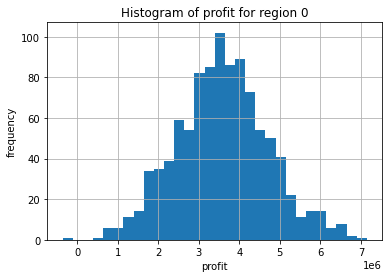

In [24]:
# print(profit0)
profit0.hist('profit', bins=30);
plt.xlabel('profit')
plt.ylabel('frequency')
plt.title('Histogram of profit for region 0');

## Calculations for region 1

In [25]:
profit1, mean_profit1, CI_lower1, CI_upper1, risk_loss1 = profit_calc(predicted_valid1)

print(f"Region 1 has mean profit: {mean_profit1},\n \t 95% CI ({CI_lower1}, {CI_upper1}), \n \t risk of loss {risk_loss1}") 

Region 1 has mean profit: 4591672.84,
 	 95% CI (760478.23, 8616321.3), 
 	 risk of loss 0.80%


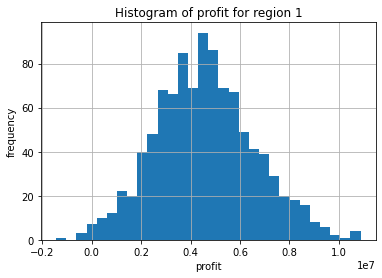

In [26]:
# print(profit0)
profit1.hist('profit', bins=30);
plt.xlabel('profit')
plt.ylabel('frequency')
plt.title('Histogram of profit for region 1');

## Calculations for region 2

In [27]:
profit2, mean_profit2, CI_lower2, CI_upper2, risk_loss2 = profit_calc(predicted_valid2)

print(f"Region 2 has mean profit: {mean_profit2},\n \t 95% CI ({CI_lower2}, {CI_upper2}), \n \t risk of loss {risk_loss2}") 

Region 2 has mean profit: 2717422.04,
 	 95% CI (911157.07, 4522088.83), 
 	 risk of loss 0.10%


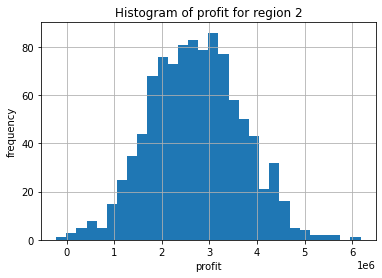

In [28]:

profit2.hist('profit', bins=30);
plt.xlabel('profit')
plt.ylabel('frequency')
plt.title('Histogram of profit for region 2');

We see that the distribution of profit from all three regions are rather symmetric. Most of the profits are greater than 0.

By comparing the mean profit, 95% CI and its width, and the risk of loss, I think the region 0 is the best region for development of oil wells. The reasons are:
1. It has high mean profit. Even though its mean profit is lower than that from region 1, we also need to consider other factors.
2. It has the narrowest width of 95% CI.
3. It has the lowest risk of loss. 

## General conclusion

In this project, we analyzed data on oil samples from three regions. . The major steps for analyzing the data are:

- import and study the datasets
- prepare and tidy up the datasets when needed
- build linear regression models that will help to compute profits
- plot distribution of profits
- compute the mean profit and the 95% confidence intervals for profits
- compute the risk of loss 
- pick the region with the highest profit margin
- draw conclusions and explain the results

The main findings are:
1. all three regions are profitable for developing oil wells. 
2. But region 0 is the best region for developing oil wells in terms of mean profit and risk of loss.


<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see well structure conclusion at the end of the project!
</div>